 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_read = pd.read_csv(Path("whale_returns.csv"), index_col=0, infer_datetime_format=True, parse_dates=True)
whale_returns_read.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_read.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_read.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_read = pd.read_csv(Path("algo_returns.csv"), index_col=0, infer_datetime_format=True, parse_dates=True)
algo_returns_read = algo_returns_read.sort_index()
algo_returns_read.head()
# YOUR CODE HERE

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_read.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_read.dropna().head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_read = pd.read_csv(Path("sp500_history.csv"), index_col=0, infer_datetime_format=True, parse_dates=True)
sp500_history_read = sp500_history_read.sort_index()
sp500_history_read.head()
# YOUR CODE HERE

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_read.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types, remove $$$
# YOUR CODE HERE
sp500_history_read.Close = sp500_history_read.Close.str.replace('$', '')
sp500_history_read.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# convert object to float
sp500_history_read.Close = sp500_history_read.Close.astype('float')
sp500_history_read.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history_read.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
# YOUR CODE HERE
#sp500_returns.reset_index()
sp500_returns.rename(columns={"Close": "S&P_500_Returns"}, inplace=True)

In [15]:
sp500_returns.head()

,S&P_500_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
daily_portfolio = pd.concat([whale_returns_read, algo_returns_read, sp500_returns], axis="columns", join="inner")
daily_portfolio.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

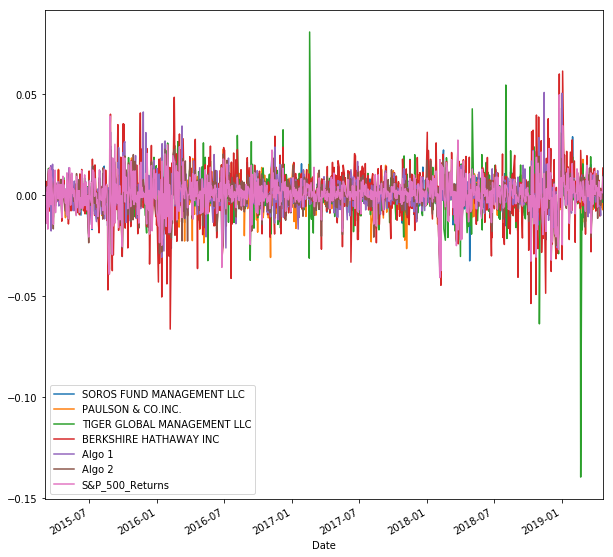

In [17]:
# Plot daily returns
# YOUR CODE HERE
daily_portfolio.plot(figsize=(10, 10))

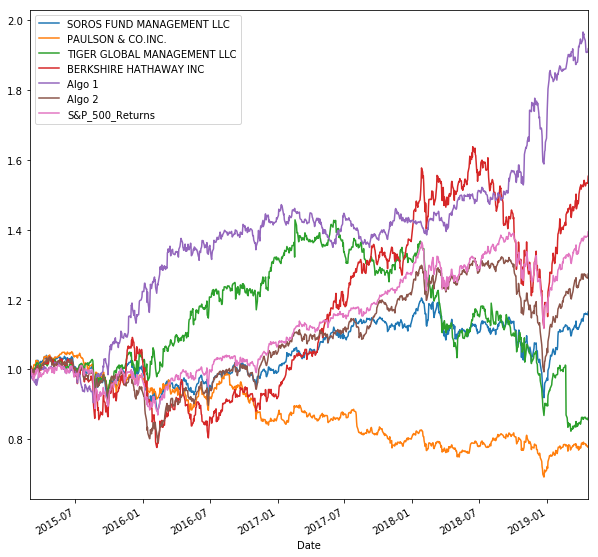

In [18]:
# Plot cumulative returns
# YOUR CODE HERE
cum_returns = (1 + daily_portfolio).cumprod()
cum_returns.plot(figsize=(10, 10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

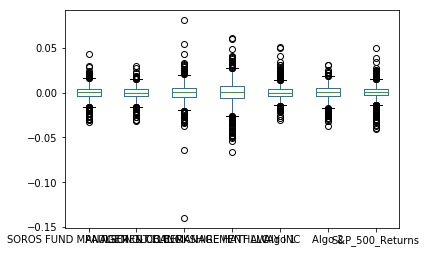

In [19]:
# Box plot to visually show risk
# YOUR CODE HERE
daily_portfolio.plot.box()

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_portfolio.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Returns
count,1043.000000,1043.000000,1043.000000,1043.000000,1044.000000,1044.000000,1044.000000
mean,0.000177,-0.000214,-0.000083,0.000506,0.000653,0.000266,0.000355
std,0.007895,0.007023,0.010894,0.012919,0.007621,0.008339,0.008551
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.040979
25%,-0.003638,-0.004042,-0.004790,-0.005634,-0.003271,-0.003788,-0.002878
50%,0.000518,0.000000,0.000320,0.000735,0.000069,0.000730,0.000450
75%,0.004328,0.003626,0.005285,0.007619,0.003896,0.005241,0.004481
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.049594


In [21]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp500_risk = daily_portfolio["S&P_500_Returns"].std()

for riskier_than_sp500 in daily_portfolio.std():
    if riskier_than_sp500 > sp500_risk:
        print(riskier_than_sp500)

0.010893969618743032
0.012918618441883524


In [22]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
daily_portfolio.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
S&P_500_Returns                0.135751
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

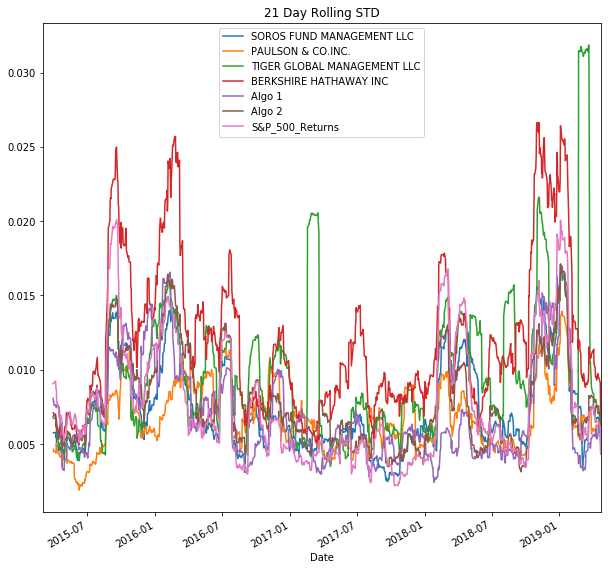

In [23]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
daily_portfolio.rolling(window=21).std().plot(figsize=(10, 10), title="21 Day Rolling STD")

In [24]:
# Correlation
# YOUR CODE HERE
daily_portfolio.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753
S&P_500_Returns,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000


In [25]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [26]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [27]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_sensitivy = (daily_portfolio.mean()*252) / (daily_portfolio.std()*np.sqrt(252))
sharpe_sensitivy

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
S&P_500_Returns                0.658706
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

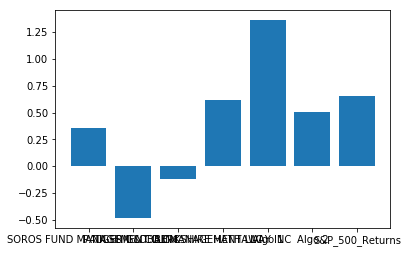

In [28]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
x = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC",  "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P_500_Returns"]
std_dev = [ 0.356417, -0.483570, -0.121060, 0.621810, 1.360829, 0.506929, 0.658706]
plt.bar(x, std_dev)
plt.show()

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Read the first stock - Google
# YOUR CODE HERE
goog_read = pd.read_csv(Path("goog_historical.csv"), index_col=[1], infer_datetime_format=True, parse_dates=True)
goog_read.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [33]:
# Sort data
goog_read = goog_read.sort_index()
goog_read.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [34]:
# Read the second stock - Costco
# YOUR CODE HERE
cost_read = pd.read_csv(Path("cost_historical.csv"), index_col=[1], infer_datetime_format=True, parse_dates=True)
cost_read.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [35]:
# Sort data
cost_read = cost_read.sort_index()
cost_read.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [36]:
# Read the third stock - Apple
# YOUR CODE HERE
aapl_read = pd.read_csv(Path("aapl_historical.csv"), index_col=[1], infer_datetime_format=True, parse_dates=True)
aapl_read.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [37]:
# Sort data
aapl_read = aapl_read.sort_index()
aapl_read.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [39]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
joined_port = pd.concat([aapl_read, cost_read, goog_read], axis='rows', join='inner').reset_index()
joined_port.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,AAPL,188.59
1,2018-05-14,AAPL,188.15
2,2018-05-15,AAPL,186.44
3,2018-05-16,AAPL,188.18
4,2018-05-17,AAPL,186.99


In [40]:
# Reset the index
# YOUR CODE HERE

Trade DATE    0
Symbol        0
NOCP          0
dtype: int64

In [41]:
# Drop Nulls
# YOUR CODE HERE
joined_port.isnull().sum()

Trade DATE    0
Symbol        0
NOCP          0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# YOUR CODE HERE

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
# YOUR CODE HERE

In [38]:
# Rolling
# YOUR CODE HERE

In [39]:
# Beta
# YOUR CODE HERE

In [40]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE